# Two qubit circuit, state visualization

This notebook consists of some code that will initialize a two qubit circuit, draw the circuit diagram, and then plot the state of the two-qubit system using the Bloch Sphere

In [7]:
# imports
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import numpy as np

# show qiskit version
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.2.1


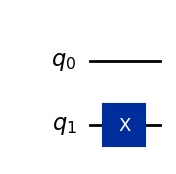

In [8]:
# Initialize Quantum Circuit with 2 Qubits, q0 will point at |0> and q1 will point at |1>
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

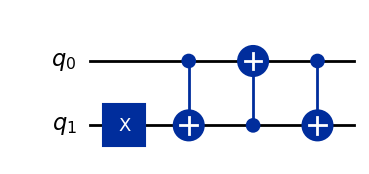

In [9]:
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)

qc.draw('mpl')

In [10]:
# Get Statevector
state = Statevector.from_instruction(qc)

# Display the Unitary Matrix
unitary = Operator(qc).data
print("Unitary matrix:")
display(print(unitary))

# Display Statevector
matrix_form = np.array(state).reshape(-1, 1)
print("\nStatevector as a matrix:")
display(print(matrix_form))

#LaTeX output
print("\nStatevector in LaTeX output:")
display(state.draw(output='latex'))

Unitary matrix:
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


None


Statevector as a matrix:
[[0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]]


None


Statevector in LaTeX output:


<IPython.core.display.Latex object>

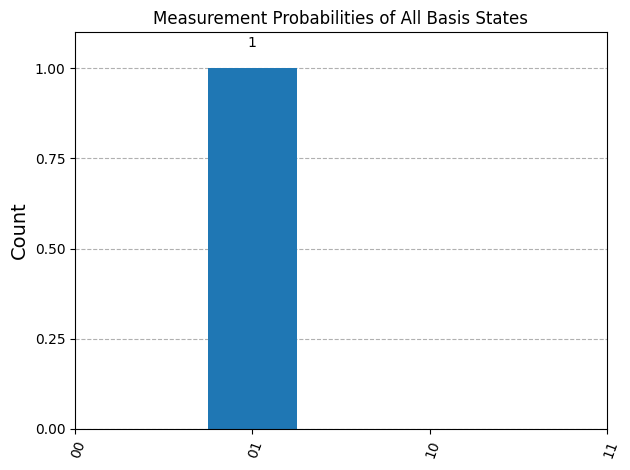

In [11]:
# Get all probabilities
p = state.probabilities_dict()

# Get and label each probability
basis_states = ['00', '01', '10', '11']
p_all = {s: p.get(s, 0) for s in basis_states}

# Plot the histogram with all 4 basis states
plot_histogram(p_all, title="Measurement Probabilities of All Basis States")

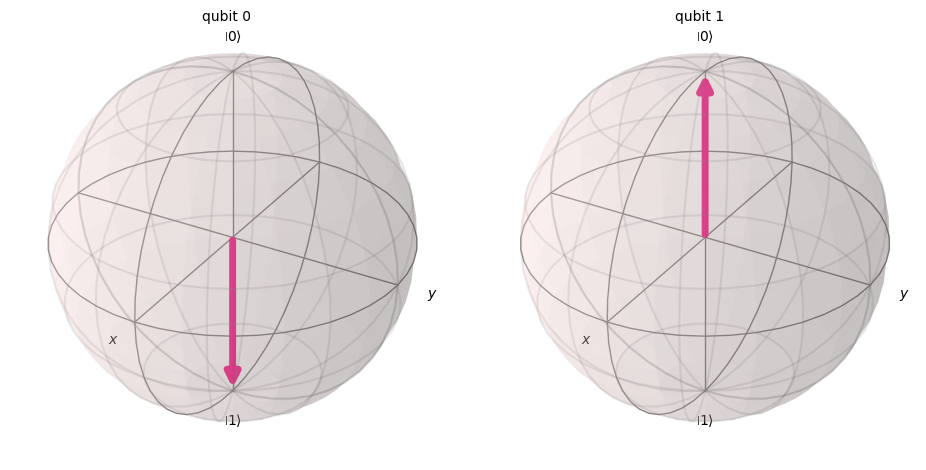

In [12]:
# Display Bloch Sphere
plot_bloch_multivector(state)